Import Libraries and Load Cleaned Data

In [1]:
# Import Libraries and Load the Cleaned Data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "../data/processed/mental_health_cleaned.csv"
df = pd.read_csv(data_path)

print("Cleaned data loaded successfully:", df.shape)
df.head(3)

Cleaned data loaded successfully: (1433, 63)


,are_you_selfemployed,how_many_employees_does_your_company_or_organization_have,is_your_employer_primarily_a_tech_companyorganization,is_your_primary_role_within_your_company_related_to_techit,does_your_employer_provide_mental_health_benefits_as_part_of_healthcare_coverage,do_you_know_the_options_for_mental_health_care_available_under_your_employerprovided_coverage,has_your_employer_ever_formally_discussed_mental_health_for_example_as_part_of_a_wellness_campaign_or_other_official_communication,does_your_employer_offer_resources_to_learn_more_about_mental_health_concerns_and_options_for_seeking_help,is_your_anonymity_protected_if_you_choose_to_take_advantage_of_mental_health_or_substance_abuse_treatment_resources_provided_by_your_employer,if_a_mental_health_issue_prompted_you_to_request_a_medical_leave_from_work_asking_for_that_leave_would_be,...,if_you_have_a_mental_health_issue_do_you_feel_that_it_interferes_with_your_work_when_being_treated_effectively,if_you_have_a_mental_health_issue_do_you_feel_that_it_interferes_with_your_work_when_not_being_treated_effectively,what_is_your_age,what_is_your_gender,what_country_do_you_live_in,what_us_state_or_territory_do_you_live_in,what_country_do_you_work_in,what_us_state_or_territory_do_you_work_in,which_of_the_following_best_describes_your_work_position,do_you_work_remotely
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39.0,male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29.0,male,United States,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38.0,male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always


Gender Cleaning and Encoding

In [2]:
df['gender_cleaned'] = df['what_is_your_gender'].str.strip().str.lower()

gender_dummies = pd.get_dummies(df['gender_cleaned'], prefix='gender')
df = pd.concat([df, gender_dummies], axis=1)

print("Gender column cleaned and encoded successfully")

Gender column cleaned and encoded successfully


Simplify and Encode Country Column

In [3]:
# Simplify Country Categories (Keep Top 10, Group Others) 
top_countries = df['what_country_do_you_live_in'].value_counts().head(10).index
df['country_grouped'] = df['what_country_do_you_live_in'].apply(lambda x: x if x in top_countries else 'Other')

# Encode as dummies
country_dummies = pd.get_dummies(df['country_grouped'], prefix='country')
df = pd.concat([df, country_dummies], axis=1)

print("Country column grouped and encoded successfully")

Country column grouped and encoded successfully


Convert Yes/No Columns to Numeric

In [4]:
# === Convert Yes/No Columns to Numeric ===
yes_no_columns = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() <= 3]

pd.set_option('future.no_silent_downcasting', True)


for col in yes_no_columns:
    df[col] = df[col].replace({
        'Yes': 1,
        'No': 0,
        'Maybe': np.nan,
        'Don’t know': np.nan
    })
    # Explicitly infer object types to avoid FutureWarning
    df[col] = df[col].infer_objects(copy=False)

print("Boolean columns converted to numeric format (no warnings)")

Boolean columns converted to numeric format (no warnings)


Create Age Groups

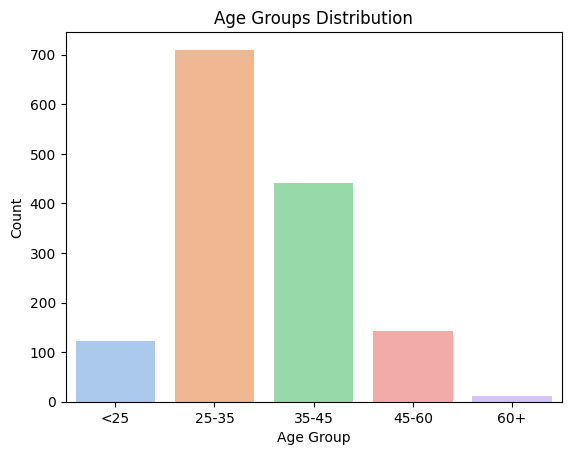

Age groups created successfully


In [5]:
# Create Age Groups 
bins = [0, 25, 35, 45, 60, 100]
labels = ['<25', '25-35', '35-45', '45-60', '60+']
df['age_group'] = pd.cut(df['what_is_your_age'], bins=bins, labels=labels, right=False)

sns.countplot(x='age_group', hue='age_group', data=df, palette='pastel', legend=False)
plt.title("Age Groups Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

print("Age groups created successfully")

 Mental Health Support Score

In [6]:
# Create a Feature for Awareness or Support 
# Example: Does the company provide mental health benefits or discussions?
if {'benefits', 'care_options', 'wellness_program'} <= set(df.columns):
    df['mental_health_support_score'] = (
        df[['benefits', 'care_options', 'wellness_program']].sum(axis=1)
    )
else:
    print(" Warning: Some expected columns not found!")

print("Mental health support feature created")

Mental health support feature created


 Drop Unnecessary Columns

In [7]:
# === Drop Columns That Are Not Useful for Modeling ===
drop_cols = ['gender', 'country', 'Timestamp']
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

print("Unused columns dropped")

Unused columns dropped


 Save Final Feature-Engineered Data

In [8]:
# Save Final Feature-Engineered Dataset 
output_path = "../data/processed/mental_health_features.csv"
df.to_csv(output_path, index=False)

print(f"Feature-engineered dataset saved successfully to: {output_path}")

Feature-engineered dataset saved successfully to: ../data/processed/mental_health_features.csv
